<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **45 to 60** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [ ]:
!pip install pandas

### Step 1: Import Required Libraries


In [1]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame


#### **Read Data**


If you are using JupyterLite, use the code below to download the dataset into your environment. If you are using a local environment, you can use the direct URL with <code>pd.read_csv()</code>.


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

# Define the file path for the data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Download the dataset
await download(file_path, "survey_data.csv")
file_name = "survey_data.csv"


**Load the data into a pandas dataframe:**


In [2]:
df = pd.read_csv('../survey-data.csv')

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



##### df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [3]:
# your code goes here
df_dup = df[df.duplicated()]

In [4]:
df_dup.shape

(0, 114)

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [5]:
# your code goes here
print(f"The number of rows before removing duplicates: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"The number of rows after removing duplicates: {df.shape[0]}")

The number of rows before removing duplicates: 65437
The number of rows after removing duplicates: 65437


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [ ]:
# your code goes here
df_missing_values = df.isnull()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
65433,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
65434,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
65435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [11]:
for col in df_missing_values.columns:
    print(f"Column '{col}' has\t\t\t\t\t {df_missing_values[col].value_counts().get(True, 0)}")

Column 'ResponseId' has					 0
Column 'MainBranch' has					 0
Column 'Age' has					 0
Column 'Employment' has					 0
Column 'RemoteWork' has					 10631
Column 'Check' has					 0
Column 'CodingActivities' has					 10971
Column 'EdLevel' has					 4653
Column 'LearnCode' has					 4949
Column 'LearnCodeOnline' has					 16200
Column 'TechDoc' has					 24540
Column 'YearsCode' has					 5568
Column 'YearsCodePro' has					 13827
Column 'DevType' has					 5992
Column 'OrgSize' has					 17957
Column 'PurchaseInfluence' has					 18031
Column 'BuyNewTool' has					 20256
Column 'BuildvsBuy' has					 22079
Column 'TechEndorse' has					 21769
Column 'Country' has					 6507
Column 'Currency' has					 18753
Column 'CompTotal' has					 31697
Column 'LanguageHaveWorkedWith' has					 5692
Column 'LanguageWantToWorkWith' has					 9685
Column 'LanguageAdmired' has					 14565
Column 'DatabaseHaveWorkedWith' has					 15183
Column 'DatabaseWantToWorkWith' has					 22879
Column 'DatabaseAdmired' has					 26880


In [14]:
for col in df.columns:
    print(f"Column '{col}': {df[col].dtype}")

Column 'ResponseId': int64
Column 'MainBranch': object
Column 'Age': object
Column 'Employment': object
Column 'RemoteWork': object
Column 'Check': object
Column 'CodingActivities': object
Column 'EdLevel': object
Column 'LearnCode': object
Column 'LearnCodeOnline': object
Column 'TechDoc': object
Column 'YearsCode': object
Column 'YearsCodePro': object
Column 'DevType': object
Column 'OrgSize': object
Column 'PurchaseInfluence': object
Column 'BuyNewTool': object
Column 'BuildvsBuy': object
Column 'TechEndorse': object
Column 'Country': object
Column 'Currency': object
Column 'CompTotal': float64
Column 'LanguageHaveWorkedWith': object
Column 'LanguageWantToWorkWith': object
Column 'LanguageAdmired': object
Column 'DatabaseHaveWorkedWith': object
Column 'DatabaseWantToWorkWith': object
Column 'DatabaseAdmired': object
Column 'PlatformHaveWorkedWith': object
Column 'PlatformWantToWorkWith': object
Column 'PlatformAdmired': object
Column 'WebframeHaveWorkedWith': object
Column 'Webframe

In [16]:
most_freq_Edlevel = df['EdLevel'].value_counts().idxmax()
print(f"The most frequent education level is: {most_freq_Edlevel}")
print(f"{most_freq_Edlevel} is repeated {df['EdLevel'].value_counts().max()} times.")

The most frequent education level is: Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Bachelor’s degree (B.A., B.S., B.Eng., etc.) is repeated 24942 times.


In [17]:
df['EdLevel'].fillna(most_freq_Edlevel, inplace=True)
print(f"NOW we have {df['EdLevel'].isnull().sum()} missing values in 'EdLevel' column.")

NOW we have 0 missing values in 'EdLevel' column.


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [ ]:
# your code goes here
compensation_mean = df['ConvertedCompYearly'].mean()
df['ConvertedCompYearly'].fillna(compensation_mean, inplace=True)



C:\Users\akar\AppData\Local\Temp\ipykernel_28636\2546900917.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(compensation_mean, inplace=True)


In [ ]:
compensation_max = df['ConvertedCompYearly'].max()
compensation_min = df['ConvertedCompYearly'].min()

for index in df['ConvertedCompYearly'].index:
    df.loc[index, 'ConvertedCompYearly'] = (df['ConvertedCompYearly'][index] - compensation_min) / (compensation_max - compensation_min)

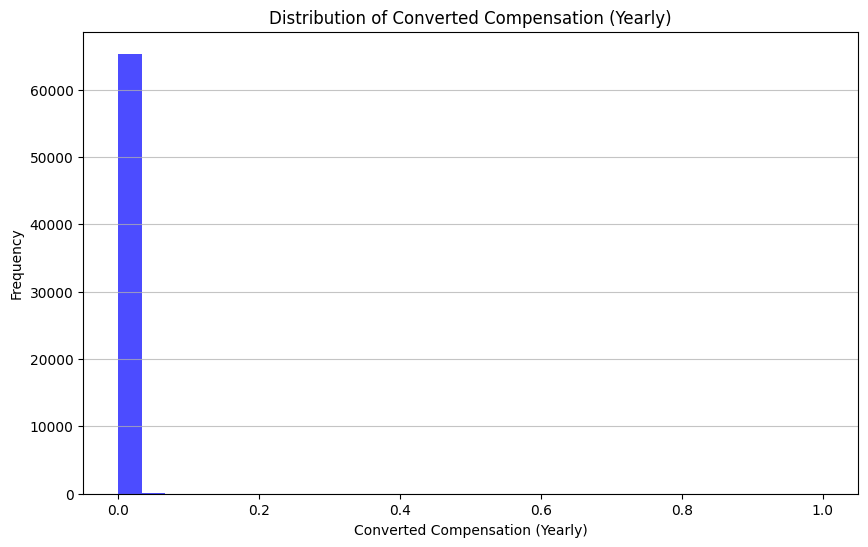

In [20]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Converted Compensation (Yearly)')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
